In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [50]:
# Define the system of differential equations
def car_system(t, z):
    x1, y1 = z
    """
    Parameters:
    - t: time
    - state_vector: state vector [d1, v1, ..., dn, vn]
    - n: number of cars
    - b, c: parameters of the system
    - T: desired time gap
    - v0: velocity of the front car (constant)
    """

    n = 1  # Number of cars
    alpha = 5
    beta = 4
    y0 = 1  # Constant velocity of the front car
    epsilon = 0.25
    a_b=0.5
    
    ddxt = ((y0-a_b*t)*(t<y0/a_b)-y1)
    ddyt = alpha*x1 + (-1-beta)*y1 + (y0-a_b*t)*(t<y0/a_b) -(epsilon/(x1))

    
    return [ddxt, ddyt]

(2, 5000)


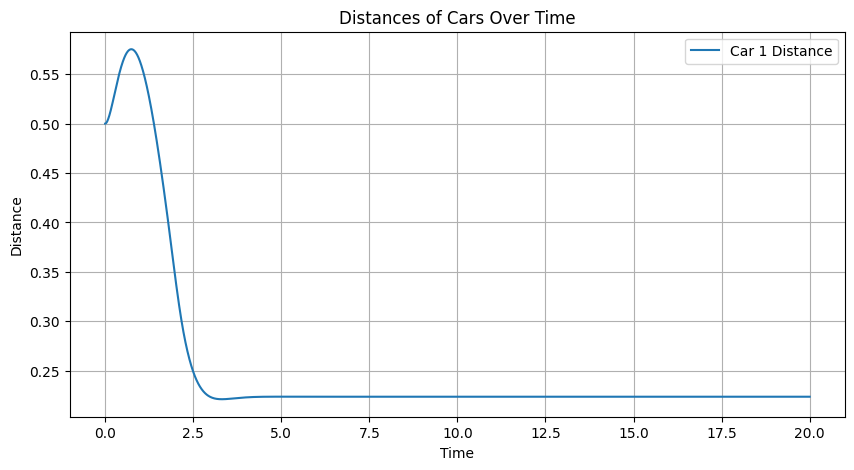

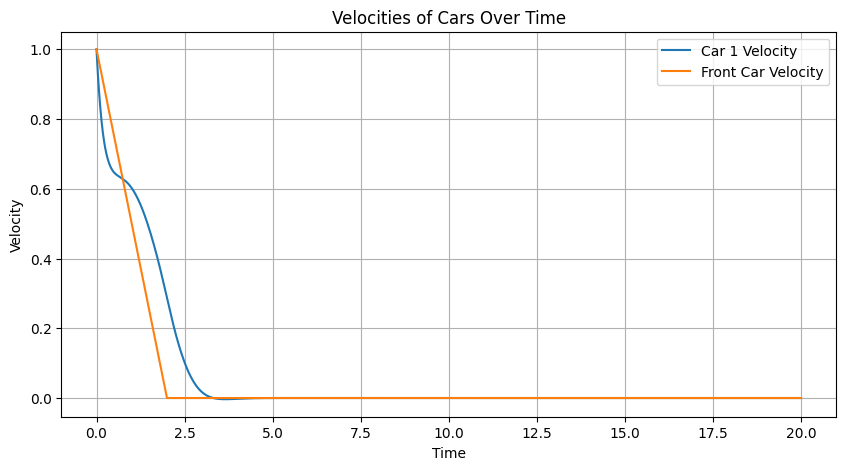

In [ ]:
# Parameters

# Initial conditions: [d1, v1, ..., dn, vn]
initial_state = np.array([0.5, 1.0])  # Example initial state

t_span = (0, 20)  # From t=0 to t=20
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Solve the system
solution = solve_ivp(car_system, t_span, initial_state, t_eval=t_eval)
    

# Extract solution
t = solution.t
y = solution.y
print(solution.y.shape)  # Output: (n, m)

# Plot the distances (positions) over time
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.plot(t, y[2 * i], label=f"Car {i + 1} Distance")
    
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend()
plt.title("Distances of Cars Over Time")
plt.grid()
plt.show()
a_b=0.5
y0=1

# Plot the velocities over time
plt.figure(figsize=(10, 5))
for i in range(n):
    plt.plot(t, y[2 * i + 1], label=f"Car {i + 1} Velocity")
plt.plot(t,(y0-a_b*t)*(t<y0/a_b),label="Front Car Velocity")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()
plt.title("Velocities of Cars Over Time")
plt.grid()
plt.show()